In [2]:
using DifferentialEquations


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %==========>                              ]  23.4 %]  46.7 % [=============================>           ]  70.2 %Fetching: [=================================>       ]  80.8 % Resolving package versions...
 Installed Missings ───────── v0.4.0
 Installed DiffEqCallbacks ── v2.5.1
 Installed StochasticDiffEq ─ v5.11.1
 Installed OrdinaryDiffEq ─── v4.20.0
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [459566f4] ↑ DiffEqCallbacks v2.5.0 ⇒ v2.5.1
  [e1d29d7a] ↑ Missings v0.3.1 ⇒ v0.4.0
  [1dea7af3] ↑ OrdinaryDiffEq v4.19.0 ⇒ v4.20.0
  [789caeaf] ↑ StochasticDiffEq v5.11.0 ⇒ v5.11.1


In [5]:
function macroParasiteModelFunction(dY,Y,p,t)
    #Host Birth Rate
    a = p[1]
    #Parasite Influence on host birth rate
    b = p[2]
    #Parasite induced host mortality
    α = p[3]
    #Parasite induced decrease in host reproduction
    β = p[4]
    #Intrinsic death rate of parasites
    μ = p[5]
    #dispersion aggregation parameter
    k = p[6]
    #Rate of production of new free-living stages
    λ = p[7]
    #Death Rate of Free-Living Stages
    γ = p[8]
    
    #Host Population
    H = Y[1]
    #Parasite Population
    P = Y[2]
    #Infective Stages
    W = Y[3]
    
dY[1] = (a-b)*H - α*P
dY[2] = β*H*W - (μ + α + b) * P - (α*((P^2)/H)*((k+1)/k)) 
dY[3] = λ*P - (γ*W) - (β*H*W)
end


macroParasiteModelFunction (generic function with 1 method)

In [6]:
par=[1.4,1.05,0.0003,0.01,0.5,0.1,10.0,10.0]
init=[100.0,10.0,10.0]
tspan=(0.0,100.0)


(0.0, 100.0)

In [7]:
macro_odeProblem = ODEProblem(macroParasiteModelFunction,init,tspan,par)


ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [100.0, 10.0, 10.0]

In [8]:
sol=solve(macro_odeProblem);


In [9]:
using Plots


 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


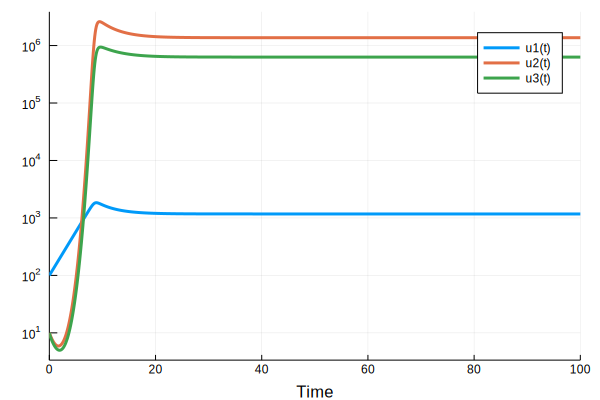

In [10]:
plot(sol,xlabel="Time",yscale=:log10)
